

##Importing Libraries



In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

##Download and access Dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')
df

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   63.0    302 non-null    float64
 1   1.0     302 non-null    float64
 2   1.0.1   302 non-null    float64
 3   145.0   302 non-null    float64
 4   233.0   302 non-null    float64
 5   1.0.2   302 non-null    float64
 6   2.0     302 non-null    float64
 7   150.0   302 non-null    float64
 8   0.0     302 non-null    float64
 9   2.3     302 non-null    float64
 10  3.0     302 non-null    float64
 11  0.0.1   302 non-null    object 
 12  6.0     302 non-null    object 
 13  0       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [4]:
df.describe()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


##EDA and Preprocessing


In [5]:
df.replace('?', np.nan, inplace=True)

In [6]:
df.isna().sum()

,0
63.0,0
1.0,0
1.0.1,0
145.0,0
233.0,0
1.0.2,0
2.0,0
150.0,0
0.0,0
2.3,0


In [7]:
df['0.0.1'].unique()

array(['3.0', '2.0', '0.0', '1.0', nan], dtype=object)

In [8]:
df['6.0'].unique()

array(['3.0', '7.0', '6.0', nan], dtype=object)

In [9]:
df['0.0.1'].fillna(df['0.0.1'].mode()[0],inplace = True)

/tmp/ipython-input-1177035162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['0.0.1'].fillna(df['0.0.1'].mode()[0],inplace = True)


In [10]:
df['6.0'].fillna(df['6.0'].mode()[0],inplace = True)

/tmp/ipython-input-2539876157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['6.0'].fillna(df['6.0'].mode()[0],inplace = True)


In [11]:
df.isnull().sum()

,0
63.0,0
1.0,0
1.0.1,0
145.0,0
233.0,0
1.0.2,0
2.0,0
150.0,0
0.0,0
2.3,0


In [12]:
df['0'] = (df['0']> 0)

In [13]:
corr = df.corr()
corr

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
63.0,1.000000,-0.099925,0.112326,0.283257,0.210120,0.112245,0.146142,-0.394448,0.094065,0.201083,0.156199,0.368415,0.126509,0.226668
1.0,-0.099925,1.000000,0.015342,-0.066292,-0.199492,0.042863,0.019386,-0.048740,0.148019,0.099976,0.032671,0.087806,0.379651,0.279518
1.0.1,0.112326,0.015342,1.000000,-0.030717,0.070950,-0.022524,0.075854,-0.337136,0.382394,0.212589,0.171926,0.229945,0.269475,0.411625
145.0,0.283257,-0.066292,-0.030717,1.000000,0.130924,0.171127,0.144395,-0.045437,0.066627,0.186987,0.112752,0.099490,0.132991,0.153496
233.0,0.210120,-0.199492,0.070950,0.130924,1.000000,0.012058,0.172249,-0.003417,0.060755,0.047617,-0.002085,0.123220,0.018946,0.084485
1.0.2,0.112245,0.042863,-0.022524,0.171127,0.012058,1.000000,0.062202,-0.008067,0.031514,-0.002907,0.042630,0.147936,0.060007,0.032923
2.0,0.146142,0.019386,0.075854,0.144395,0.172249,0.062202,1.000000,-0.083591,0.087432,0.110879,0.127603,0.134486,0.022157,0.172840
150.0,-0.394448,-0.048740,-0.337136,-0.045437,-0.003417,-0.008067,-0.083591,1.000000,-0.378368,-0.343821,-0.389078,-0.265881,-0.274378,-0.417701
0.0,0.094065,0.148019,0.382394,0.066627,0.060755,0.031514,0.087432,-0.378368,1.000000,0.291536,0.265491,0.144385,0.327262,0.430721
2.3,0.201083,0.099976,0.212589,0.186987,0.047617,-0.002907,0.110879,-0.343821,0.291536,1.000000,0.575415,0.304478,0.340942,0.429268


<Axes: >

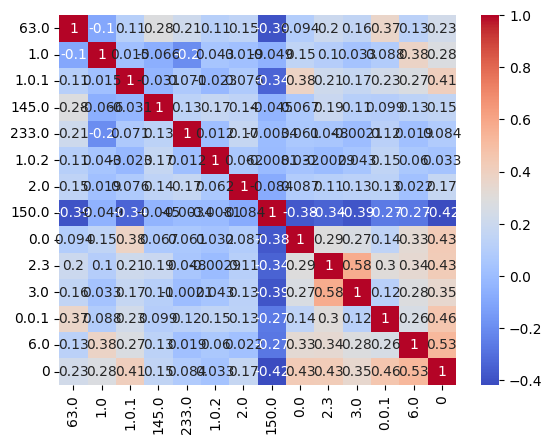

In [14]:
sns.heatmap(corr , cmap = 'coolwarm' , annot=True)

In [15]:
X = df.drop('0', axis=1)
y = df['0']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
logistic = LogisticRegression()

In [19]:
tree = DecisionTreeClassifier()

##Pipeline

In [61]:
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

In [66]:
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier( criterion='entropy', max_depth= 3, splitter='best'))
])

## Model Training

In [47]:
model_log = logistic_pipeline.fit(X_train, y_train)

In [48]:
model_tree = tree_pipeline.fit(X_train, y_train)

In [49]:
y_pred_log = model_log.predict(X_test)

In [50]:
y_pred_tree = model_tree.predict(X_test)

In [51]:
f1_score_log = f1_score(y_test, y_pred_log)
print(f1_score_log)

0.9259259259259259


In [60]:
f1_score_tree = f1_score(y_test, y_pred_tree)
print(f1_score_tree)

0.6521739130434783


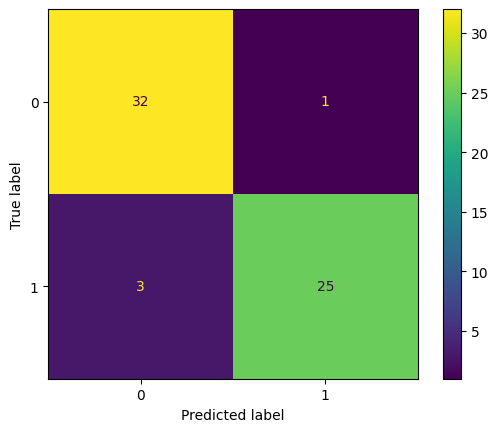

In [53]:
confusion_matrix_log = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log))
confusion_matrix_log.plot()
plt.show()


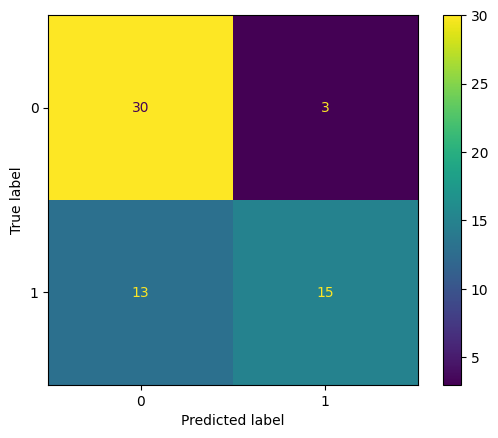

In [54]:
confusion_matrix_tree = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tree))
confusion_matrix_tree.plot()
plt.show()

##Trying Different Hyperparameters

In [67]:
model_tree = tree_pipeline.fit(X_train, y_train)

In [68]:
y_pred_log = model_tree.predict(X_test)

In [69]:
f1_score_tree = f1_score(y_test, y_pred_tree)
print(f1_score_tree)

0.6521739130434783


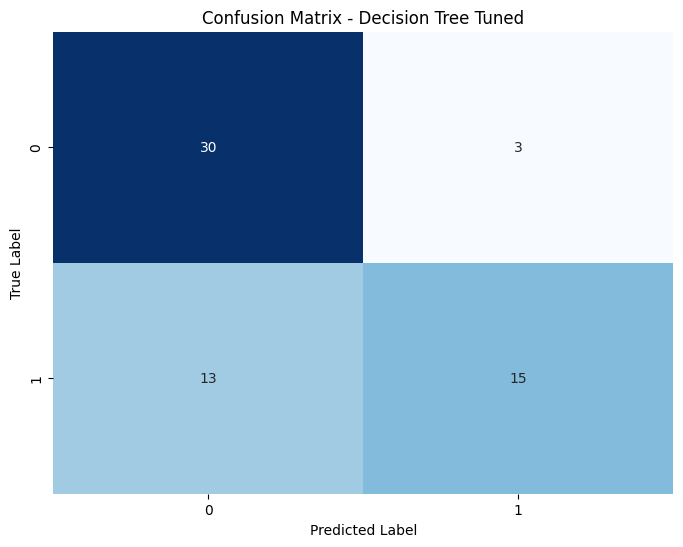

In [70]:
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Tuned')
plt.show()